In [1]:
%matplotlib widget
from solver import *

from models import NPN, PNP, Diode, Resistor, VoltageSource, CurrentSource, OpAmp, Capacitor, Inductor
import sympy as sp
from sympy import Heaviside, sin, cos
sp.init_printing()

s/(s + 1)
DiracDelta(t) - exp(-t)*Heaviside(t)


In [2]:
Vcc = 5

var = sp.Symbol("Vin", real=True)

In [3]:
oscillator = Solver.Circuit("oscillator")
oscillator.element(
                    Capacitor("C1", {"V1" : "V1", "V2" : Gnd}, C = 1e-3, V0 = 0),
                    Inductor("L1", {"V1" : "V1", "V2" : Gnd}, L = 1e-3, I0 = 1),
                    #Inductor("L1", {"V1" : "V1", "V2" : "V2"}, L = 1e-3, I0 = 1),
                    #Resistor("R1", {"V1" : "V2", "V2" : Gnd}, R = 1),
)

{'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'V1', 'V2': 0}, 'values': {'C': 0.001, 'V0': 0}},
 'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'V1', 'V2': 0}, 'values': {'L': 0.001, 'I0': 1}}}

In [4]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg", {"V+" : "V1", "V-" : Gnd}, V_t = sp.sin(t)),
                    Diode("D1", {"Vp" : "V1", "Vn" : "V2"}),
                    Resistor("R1", {"V1" : "V2", "V2" : "Vc"}, R = 1e3),
                    Resistor("R2", {"V1" : "Vc", "V2" : Gnd}, R = 1e6),
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 0, C = 1e-3),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': sin(300*t)}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 1000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 1000000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-06, 'V0': 0}}}

In [5]:
multivibrator = Solver.Circuit("multivibrator")
multivibrator.element(
    Resistor("R", {"V1" : "Vc", "V2" : "Vout"}, R = 50e3),
    OpAmp("Op1", {"V+" : "V+", "V-" : "Vc", "Vop" : "Vout", "Vcc" : Vcc, "Vee" : -Vcc}),
    Resistor("R1", {"V1" : "Vout", "V2" : "V+"}, R = 35e3),
    Resistor("R2", {"V1" : "V+", "V2" : Gnd}, R = 30e3),
    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, C = 10e-9, V0 = 1e-1),
)

{'R': {'name': 'R', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'R': 50000.0}},
 'Op1': {'name': 'Op1', 'type': 'OpAmp', 'nodes': {'V+': 'V+', 'V-': 'Vc', 'Vop': 'Vout', 'Vcc': 5, 'Vee': -5}, 'values': {'Av': oo}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 'V+'}, 'values': {'R': 35000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'V+', 'V2': 0}, 'values': {'R': 30000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-08, 'V0': 0.1}}}

In [6]:
opTest = Solver.Circuit("opTest")
opTest.element(
    
    Resistor("Rc", {"V1" : Vcc, "V2" : "Vc"}, R = 1e3),
    
    Capacitor("Cout", {"V1" : "Vc", "V2" : "Vout"}),
    Resistor("Rout", {"V1" : "Vout", "V2" : Gnd}, R = 1e3),
    
    NPN("Q1", {"Vc" : "Vc", "Vb" : "Vb", "Ve" : Gnd}),
    
    VoltageSource("Vbb", {"V+" : "Vbb", "V-" : Gnd}, Vdc = 1.6),
    Resistor("Rb", {"V1" : "Vbb", "V2" : "Vb"}, R = 31.2e3),
    
    Capacitor("Cin", {"V1" : "Vg", "V2" : "Vb"}),
    Resistor("Rg", {"V1" : "Vin", "V2" : "Vg"}, R = 1e3),
    VoltageSource("Vg", {"V+" : "Vin", "V-" : Gnd}, Vac = var),
)

{'Rc': {'name': 'Rc', 'type': 'Resistor', 'nodes': {'V1': 5, 'V2': 'Vc'}, 'values': {'R': 1000.0}},
 'Cout': {'name': 'Cout', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'C': 1e-06, 'V0': 0}},
 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 1000.0}},
 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vc', 'Vb': 'Vb', 'Ve': 0}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}},
 'Vbb': {'name': 'Vbb', 'type': 'VoltageSource', 'nodes': {'V+': 'Vbb', 'V-': 0}, 'values': {'Vdc': 1.6, 'Vac': 0, 'V_t': 0}},
 'Rb': {'name': 'Rb', 'type': 'Resistor', 'nodes': {'V1': 'Vbb', 'V2': 'Vb'}, 'values': {'R': 31200.0}},
 'Cin': {'name': 'Cin', 'type': 'Capacitor', 'nodes': {'V1': 'Vg', 'V2': 'Vb'}, 'values': {'C': 1e-06, 'V0': 0}},
 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vin', 'V2': 'Vg'}, 'values': {'R': 1000.0}},
 'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'value

In [7]:
smallSignalTest = Solver.Circuit("smallSignalTest")
smallSignalTest.element(
    VoltageSource("Vg", {"V+" : "Vin", "V-" : Gnd}, Vdc = 3, Vac = var),
    Resistor("Rg", {"V1" : "Vin", "V2" : "Vd"}, R = 1e3),
    Diode("D1", {"Vp" : "Vd", "Vn" : Gnd}),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 3, 'Vac': Vin, 'V_t': 0}},
 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vin', 'V2': 'Vd'}, 'values': {'R': 1000.0}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'Vd', 'Vn': 0}, 'values': {'Vd': 0.6, 'T': 300}}}

In [8]:
Solver.setMain("acTest")
compiled = Solver.compile()

In [9]:
model = Solver.solveLaplace(compiled, 1, 1e-3, debugLog = True)

{('R1', ''), ('C1', ''), ('D1', 'Cut'), ('R2', ''), ('Vg', '')}
[Eq(V2, 300/(s**2 + 90000)), Eq(I0_0 + I0_1, 0), Eq(I1_0, 0), Eq(I1_1, 0), Eq(I2_0, 0.001*V0 - 0.001*V1), Eq(I2_0 + I2_1, 0), Eq(I3_0, 1.0e-6*V1), Eq(I3_0 + I3_1, 0), Eq(I4_0, 1.0e-6*V1*s), Eq(I4_0 + I4_1, 0), Eq(I1_1 + I2_0, 0), Eq(I2_1 + I3_0 + I4_0, 0), Eq(I0_0 + I1_0, 0)]
[-V0 + V2 < 0.6]
-------------------------------------------------
V2 300.0/(s**2 + 90000.0)
V2 0.00333333333333333/(1.11111111111111e-5*s**2 + 1.0)
0.00333333333333333/(1.11111111111111e-5*s**2 + 1.0)
0.00333333333333333 1.11111111111111e-5*s**2 + 1.0
1.0*sin(300.0*t)*Heaviside(t)

V2 1.0*sin(300.0*t)*Heaviside(t)
V2 1.0*sin(300.0*t)*Heaviside(t, 1.0)
V2 0
-----------------
I0_0 0.0
I0_0 0.0
0.0
0.0 1
0

I0_0 0
I0_0 0
I0_0 0
-----------------
I0_1 0.0
I0_1 0.0
0.0
0.0 1
0

I0_1 0
I0_1 0
I0_1 0
-----------------
I1_0 0.0
I1_0 0.0
0.0
0.0 1
0

I1_0 0
I1_0 0
I1_0 0
-----------------
I1_1 0.0
I1_1 0.0
0.0
0.0 1
0

I1_1 0
I1_1 0
I1_1 0
-----------------
I

In [ ]:
print(compiled["nodes"])
#Vin = var
Vin = compiled["voltages"]["Vg"]["V+"]
Id = compiled["currents"]["D1"]["Vp"]
Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]
#Vc = compiled["voltages"]["C1"]["V1"] - compiled["voltages"]["C1"]["V2"]
Vc = compiled["nodes"]["Vc"]

#Ic = compiled["currents"]["Q1"]["Vc"]
#Vc = compiled["voltages"]["Q1"]["Vc"]

{'V2': V0, 'V1': V1, 'Vc': V2}


In [ ]:
printModel(model, var=t, important={Vin, Vc})

{('D1', 'Cut'), ('Vg', ''), ('R1', ''), ('C1', ''), ('R2', '')}
t ∈ Interval(0, 10.1000000000000)
{V2: 0, V1: 0.999999999999998*sin(314.159265358979*t)*Heaviside(t, 1.0)}
{V2: 0, V1: 0}
{V2: 0, V1: -6.11356458917151e-12}
-------------------------------------


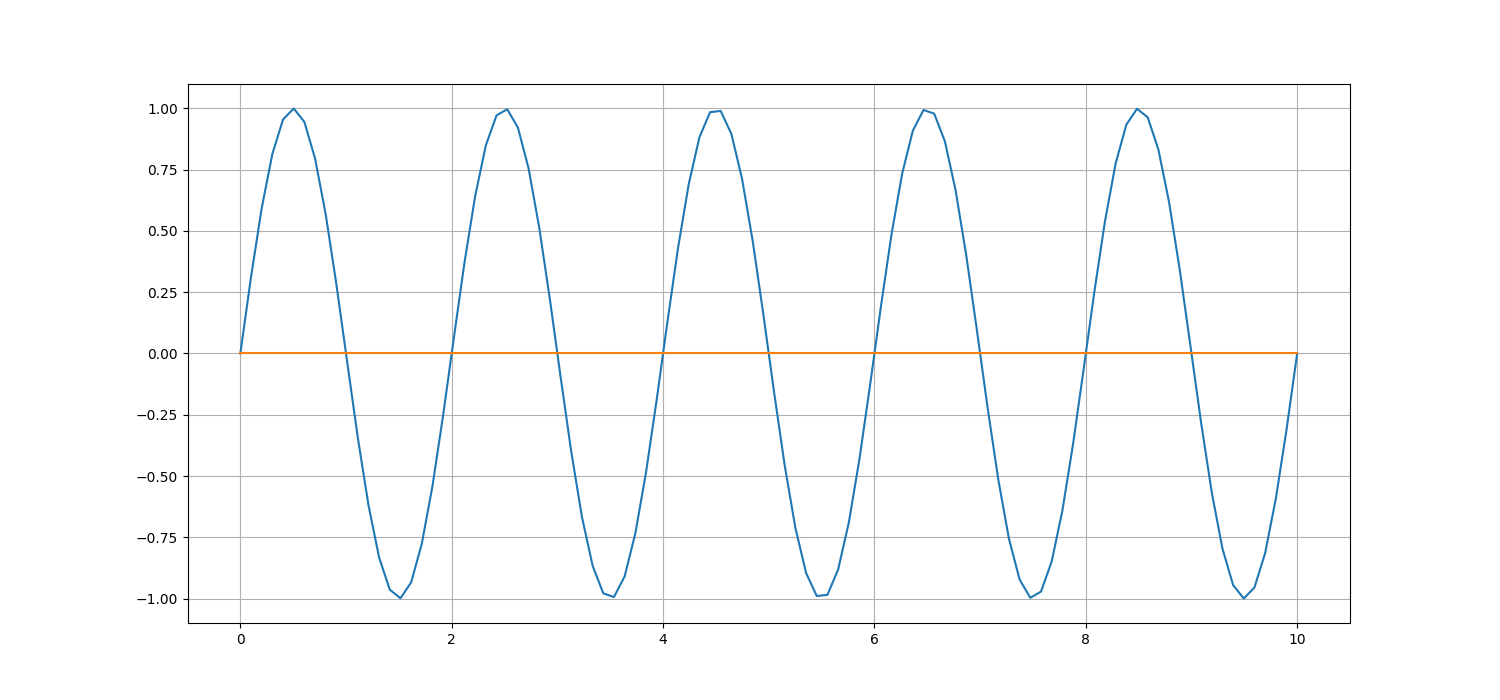

In [ ]:
measurments =   [   
                    (Vin, "Vin(t)"),
                    #(1e3 * Id, "Id(t)"),
                    #(Vd, "Vd(t)"),
                    (Vc, "Vc(t)"),
                    #(lambda sol : Uc.subs(sol), "Uc"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.1, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

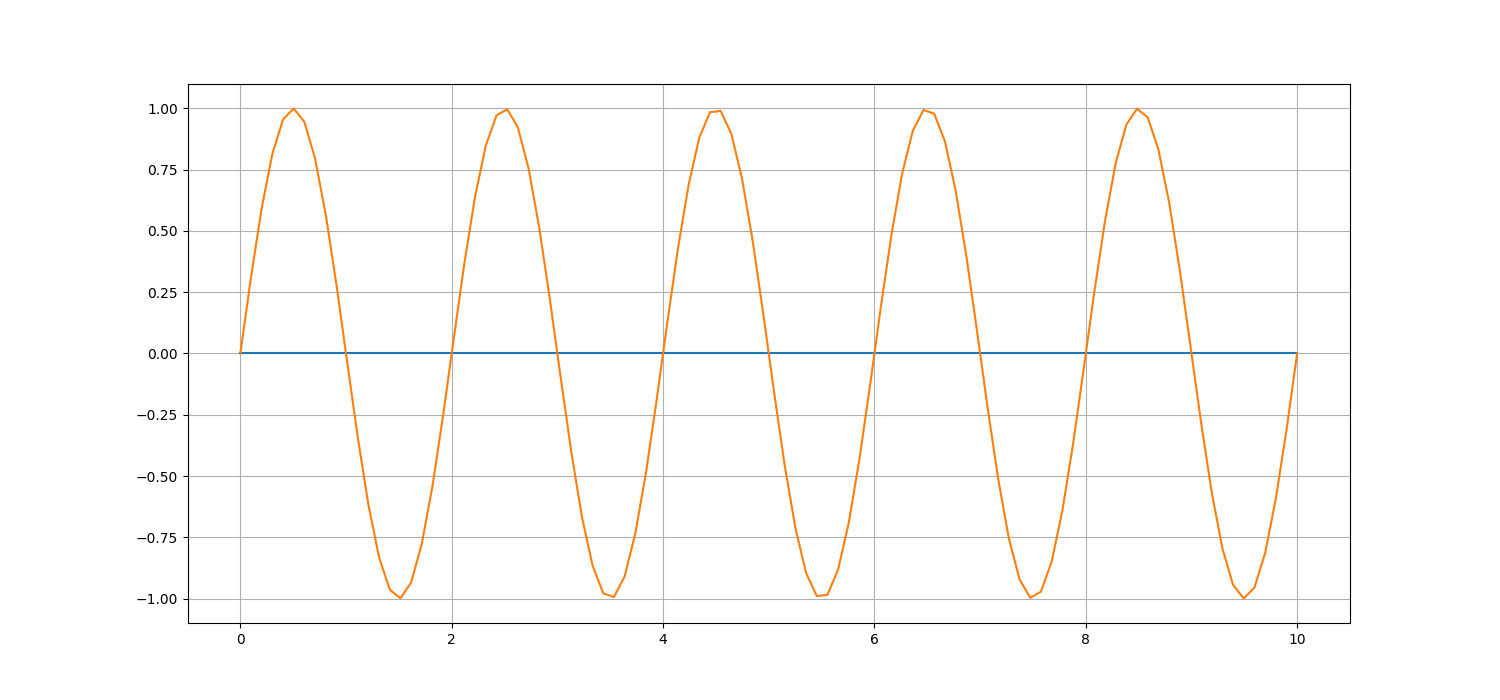

In [ ]:
measurments =   [   
                    (1e6 * Id, "Id(t)"),
                    (Vd, "Vd(t)"),
                    #(lambda sol : Uc.subs(sol), "Uc"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.1, measurments)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()